In [1]:
import numpy as np
import numpy.typing as npt
from typing import Any
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path

sys.path.append(str(Path("..")))
print(sys.path)

['/pds/pds31/sungbinlee/Research/TensorNetwork/TRG', '/pds/pds31/sungbinlee/miniconda3/envs/research/lib/python310.zip', '/pds/pds31/sungbinlee/miniconda3/envs/research/lib/python3.10', '/pds/pds31/sungbinlee/miniconda3/envs/research/lib/python3.10/lib-dynload', '', '/pds/pds31/sungbinlee/miniconda3/envs/research/lib/python3.10/site-packages', '/pds/pds31/sungbinlee/Research/IBM-Open-Science-Prize/torchquantum', '..']


In [2]:
from lib.base_manage_data import load_result, delete_result, delete_all
from lib.base_function import (
    exact_free_energy, exact_order_parameter,
    exact_internal_energy, exact_heat_capacity
)

In [3]:
state = 0
if state == 0: Kc = 1.12
else: Kc = (state-1)*np.log(1+np.sqrt(state))/state

print(f"{Kc = }")

step, Dcut = 20, 40
df = load_result(state=state, step=step, Dcut=Dcut)
df.columns.values

Kc = 1.12


array(['key', 'state', 'beta', 'magnetic_field', 'step', 'Dcut',
       'initial', 'reshape', 'decompose', 'truncate', 'total', 'process',
       'free_energy', 'order_parameter', 'hamiltonian', 'heat_capacity'],
      dtype=object)

In [4]:
df.size/df.columns.values.size

500.0

In [5]:
# delete_all()

In [6]:
# # delete = df[(df["magnetic_field"] == 0.0)]
# delete = df
# print(list(delete["key"]))
# print(len(list(delete["key"])))

In [7]:
# delete_result(list(delete["key"]))

In [8]:
df = df.sort_values("beta", ascending=True)

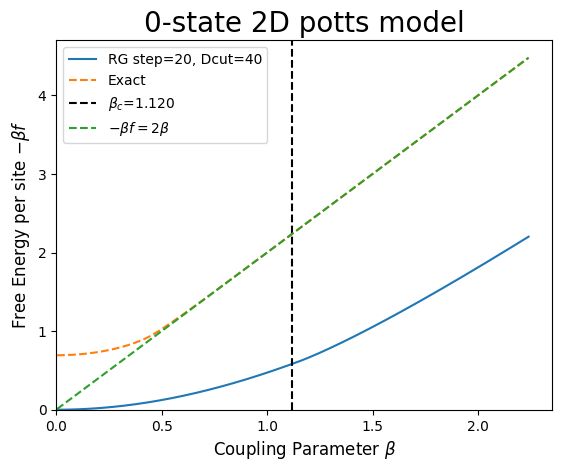

In [9]:
fig, ax = plt.subplots()

def free_energy(target_step):
    free_energy = []
    for free in df["free_energy"]:
        free_energy.append(free[target_step-1])
    return np.array(free_energy)

def get_beta(df):
    beta = []
    for params in df["beta"]:
        beta.append(params)
    return np.array(beta)

beta = get_beta(df)
target_step = 20

ax.plot(beta, free_energy(target_step), 
        label=f"RG step={target_step}, Dcut={Dcut}")
ax.plot(beta, exact_free_energy(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
ax.set_ylim([0, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Free Energy per site $-\beta f$", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")
if state != 0: ax.axhline(np.log(state), linestyle="--", label=rf"$- \beta f$ = log({state})")
ax.plot(beta, 2*beta, linestyle="--", label=rf"$- \beta f=2\beta$")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()

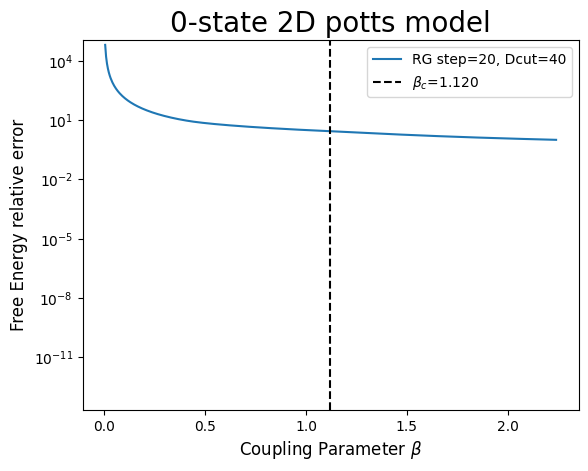

In [10]:
fig, ax = plt.subplots()

ax.plot(beta, np.abs((free_energy(
        target_step)-exact_free_energy(beta))/free_energy(target_step)),
        label=f"RG step={target_step}, Dcut={Dcut}")
ax.set_yscale("log")
# ax.set_xlim([0, coupling_max])
ax.set_ylim([2e-14, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel("Free Energy relative error", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig("./fig/{state}-state Free energy relative error.jpg")
plt.show()

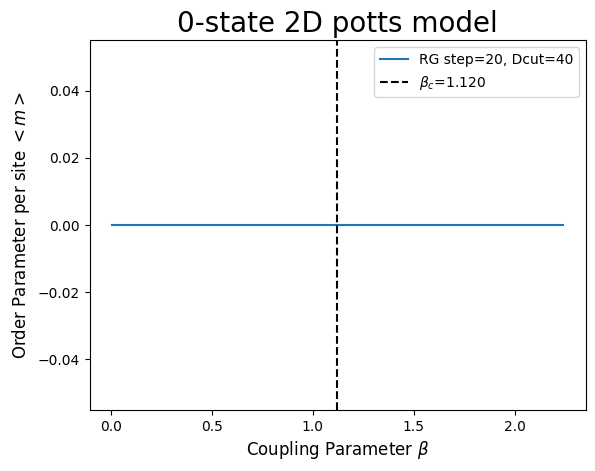

In [11]:
fig, ax = plt.subplots()

def order_parameter(target_step):
    order_parameter = []
    for value in df["order_parameter"]:
        order_parameter.append(value[target_step-1])
    
    return order_parameter

target_step = 20

ax.plot(beta, order_parameter(target_step), 
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_order_parameter(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
# ax.set_xlim([0, coupling_max])
# ax.set_ylim([0,None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Order Parameter per site $<m>$", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")
# ax.axhline(np.log(state), linestyle="--", label=rf"$- \beta f$ = log({state})")
# ax.plot(beta, 2*beta, linestyle="--", label=rf"$- \beta f=2\beta$")

plt.legend()
# plt.savefig(f"./fig/{state}-state Order parameter.jpg")
plt.show()

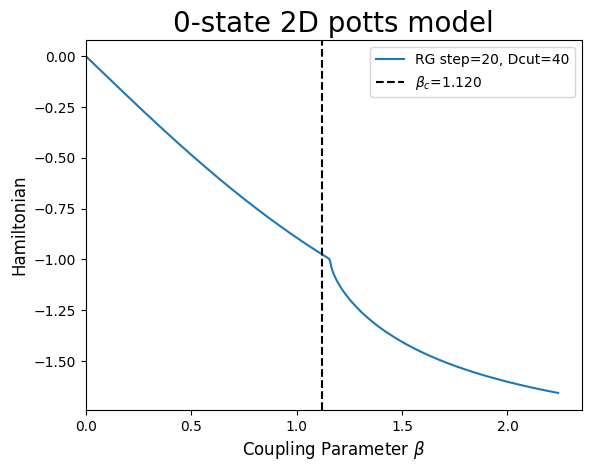

In [12]:
fig, ax = plt.subplots()

target_step = 20

hamiltonian = -np.gradient(free_energy(target_step), beta, edge_order=2)

ax.plot(beta, hamiltonian, 
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_internal_energy(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
# ax.set_ylim([-2,None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Hamiltonian", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()

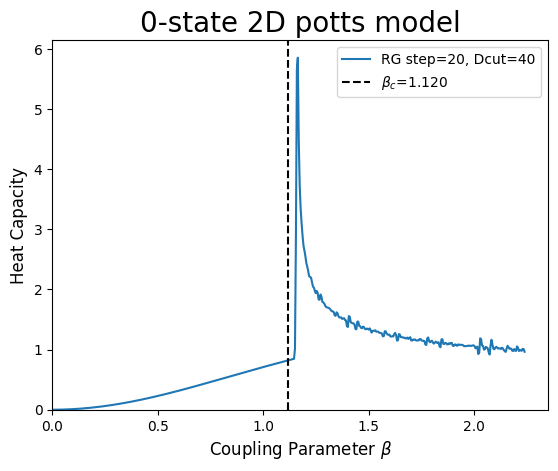

In [13]:
fig, ax = plt.subplots()

heat_capacity = -np.gradient(hamiltonian, beta, edge_order=2) * beta**2

ax.plot(beta, heat_capacity,
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_heat_capacity(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
ax.set_ylim([0, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Heat Capacity", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()